# Importing Libraries

In [1]:
import openmeteo_requests
import pandas as pd
import numpy as np
import requests_cache
from retry_requests import retry
import matplotlib.pyplot as plt


# 1.Open-Meteo API client with cache and retry on error

In [2]:
cache_session = requests_cache.CachedSession('.cache', expire_after = 3600)
retry_session = retry(cache_session, retries = 5, backoff_factor = 0.2)
openmeteo = openmeteo_requests.Client(session = retry_session)

# 2. Listing all required weather variables

In [3]:
url = "https://api.open-meteo.com/v1/forecast"
params = {
	"latitude": -33.9258,
	"longitude": 18.4232,
	"daily": ["temperature_2m_min", "temperature_2m_max", "sunrise", "sunset", "wind_speed_10m_max", "wind_gusts_10m_max", "wind_direction_10m_dominant", "precipitation_hours", "precipitation_sum", "snowfall_sum", "showers_sum", "rain_sum", "precipitation_probability_max", "uv_index_clear_sky_max", "sunshine_duration", "daylight_duration"],
	"hourly": ["temperature_2m", "precipitation_probability", "precipitation", "rain", "showers", "snowfall", "cloud_cover_high", "cloud_cover_low", "cloud_cover"],
	"models": "gfs_seamless",
	"current": ["precipitation", "rain", "showers", "snowfall", "temperature_2m", "is_day", "weather_code", "pressure_msl", "surface_pressure"],
	"timezone": "Africa/Cairo",
	"past_days": 7
}
responses = openmeteo.weather_api(url, params=params)

# 3. Processing locations.

In [4]:
SA_CITIES = {
    "Cape Town": "-33.9258,18.4232",
    "Johannesburg": "-26.2041,28.0473",
    "Durban": "-29.8587,31.0218",
    "Pretoria": "-25.7479,28.2293"
}

for city, coordinates in SA_CITIES.items():
        lat, lon = map(float, coordinates.split(','))
        params['latitude'] = lat
        params['longitude'] = lon
        responses = openmeteo.weather_api(url, params=params)
        response = responses[0]
        print(f"City: {city}")
        print(f"Coordinates {response.Latitude()}°N {response.Longitude()}°E")
        print(f"Elevation {response.Elevation()} m asl")
        print(f"Timezone {response.Timezone()}{response.TimezoneAbbreviation()}")
        print(f"Timezone difference to GMT+0 {response.UtcOffsetSeconds()} s")
        print()

City: Cape Town
Coordinates -34.031883239746094°N 18.515625°E
Elevation 25.0 m asl
Timezone b'Africa/Cairo'b'GMT+3'
Timezone difference to GMT+0 10800 s

City: Johannesburg
Coordinates -26.182876586914062°N 28.125°E
Elevation 1749.0 m asl
Timezone b'Africa/Cairo'b'GMT+3'
Timezone difference to GMT+0 10800 s

City: Durban
Coordinates -29.697357177734375°N 31.0546875°E
Elevation 25.0 m asl
Timezone b'Africa/Cairo'b'GMT+3'
Timezone difference to GMT+0 10800 s

City: Pretoria
Coordinates -25.714279174804688°N 28.2421875°E
Elevation 1376.0 m asl
Timezone b'Africa/Cairo'b'GMT+3'
Timezone difference to GMT+0 10800 s



# 4. Current Weather Data(Conditions)

In [5]:
for city, coordinates in SA_CITIES.items():
    lat, lon = map(float, coordinates.split(','))
    params['latitude'] = lat
    params['longitude'] = lon
    responses = openmeteo.weather_api(url, params=params)
    response = responses[0]
    current = response.Current()
    
    print(f"City: {city}")
    print(f"Temperature: {current.Variables(4).Value()}°C")
    print(f"Precipitation: {current.Variables(0).Value()} mm")
    print(f"Rain: {current.Variables(1).Value()} mm")
    print(f"Showers: {current.Variables(2).Value()} mm")
    print(f"Snowfall: {current.Variables(3).Value()} mm")
    print(f"Pressure (MSL): {current.Variables(7).Value()} hPa")
    print(f"Surface Pressure: {current.Variables(8).Value()} hPa")

  


City: Cape Town
Temperature: 24.950000762939453°C
Precipitation: 0.0 mm
Rain: 0.0 mm
Showers: 0.0 mm
Snowfall: 0.0 mm
Pressure (MSL): 1018.2000122070312 hPa
Surface Pressure: 1015.28759765625 hPa
City: Johannesburg
Temperature: 20.0°C
Precipitation: 0.0 mm
Rain: 0.0 mm
Showers: 0.0 mm
Snowfall: 0.0 mm
Pressure (MSL): 1019.2000122070312 hPa
Surface Pressure: 834.476318359375 hPa
City: Durban
Temperature: 23.25°C
Precipitation: 0.0 mm
Rain: 0.0 mm
Showers: 0.0 mm
Snowfall: 0.0 mm
Pressure (MSL): 1021.2000122070312 hPa
Surface Pressure: 1018.262451171875 hPa
City: Pretoria
Temperature: 21.25°C
Precipitation: 0.0 mm
Rain: 0.0 mm
Showers: 0.0 mm
Snowfall: 0.0 mm
Pressure (MSL): 1019.5999755859375 hPa
Surface Pressure: 871.1986694335938 hPa


# 5. Daily Weather Data(Conditions)

In [6]:

daily_weather_data = {}

for city, coordinates in SA_CITIES.items():
    lat, lon = map(float, coordinates.split(','))
    params['latitude'] = lat
    params['longitude'] = lon
    responses = openmeteo.weather_api(url, params=params)
    response = responses[0]
    daily = response.Daily()
    
    daily_weather_data[city] = {
        "Min Temperature (°C)": daily.Variables(0).ValuesAsNumpy(),
        "Max Temperature (°C)": daily.Variables(1).ValuesAsNumpy(),
        "Wind Speed (m/s)": daily.Variables(4).ValuesAsNumpy(),
        "Precipitation (mm)": daily.Variables(9).ValuesAsNumpy(),
        "Sunshine Duration (hours)": daily.Variables(15).ValuesAsNumpy() / 3600
    }

for city, data in daily_weather_data.items():
    print(f"City: {city}")
    for key, value in data.items():
        print(f"{key}: {value}")
    print()

City: Cape Town
Min Temperature (°C): [15.01     15.01     14.81     12.41     12.91     14.81     15.31
 16.41     19.51     17.210001 17.11     15.21     12.110001 12.610001]
Max Temperature (°C): [21.710001 19.710001 18.210001 17.51     18.41     20.210001 20.210001
 25.01     27.91     20.91     24.91     19.01     16.01     14.26    ]
Wind Speed (m/s): [10.182337 19.969458 33.70377  11.480557 10.799999 10.829959 11.901798
 10.829958  8.654986 11.659777 13.276144 32.90408  30.886656 14.917212]
Precipitation (mm): [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Sunshine Duration (hours): [10.534921  10.508551  10.482466  10.456686  10.431238  10.406146
 10.3814335 10.357127  10.333249  10.309828  10.286891  10.2644615
 10.242567  10.221237 ]

City: Johannesburg
Min Temperature (°C): [12.4325    12.9325    12.8324995 12.3324995  9.6325    10.4325
 10.9325    12.6325    13.1325    12.7325    13.7325    14.4325
 14.6825     3.3825   ]
Max Temperature (°C): [22.5325   22.0325   21.0325   18

# 6. Visualization

#### Daily Min and Max Temperatures for Major Cities

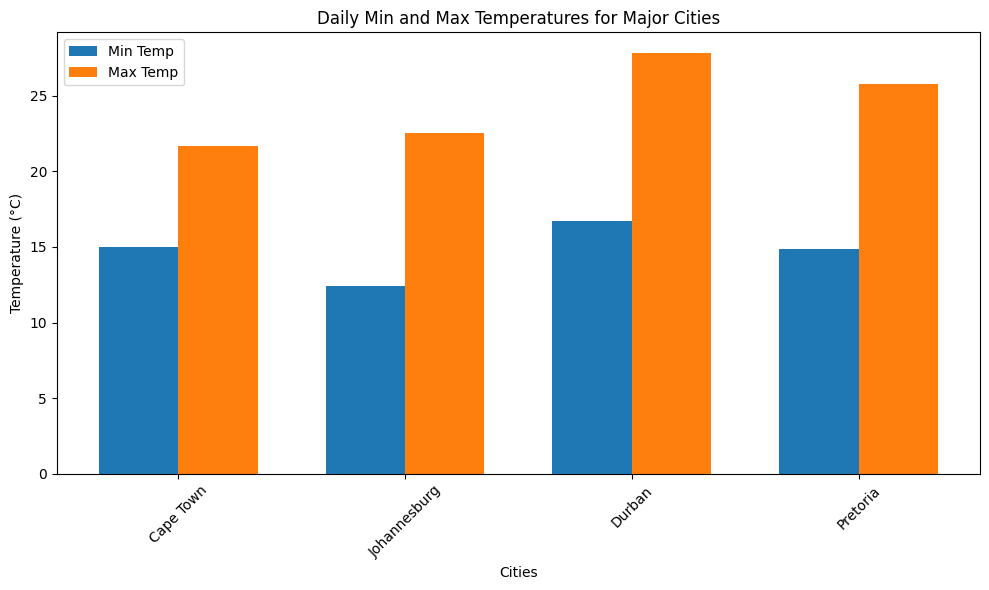

In [7]:


SA_CITIES = {
    "Cape Town": "-33.9258,18.4232",
    "Johannesburg": "-26.2041,28.0473",
    "Durban": "-29.8587,31.0218",
    "Pretoria": "-25.7479,28.2293"
}

city_names = list(SA_CITIES.keys())
min_temps = []
max_temps = []

for city, coordinates in SA_CITIES.items():
    lat, lon = map(float, coordinates.split(','))
    params['latitude'] = lat
    params['longitude'] = lon
    responses = openmeteo.weather_api(url, params=params)
    response = responses[0]
    
    daily = response.Daily()
    min_temps.append(daily.Variables(0).ValuesAsNumpy()[0])  # First day's min temp
    max_temps.append(daily.Variables(1).ValuesAsNumpy()[0])  # First day's max temp


x = np.arange(len(city_names))
width = 0.35

fig, ax = plt.subplots(figsize=(10, 6))
bars1 = ax.bar(x - width/2, min_temps, width, label='Min Temp')
bars2 = ax.bar(x + width/2, max_temps, width, label='Max Temp')

ax.set_xlabel('Cities')
ax.set_ylabel('Temperature (°C)')
ax.set_title('Daily Min and Max Temperatures for Major Cities')
ax.set_xticks(x)
ax.set_xticklabels(city_names, rotation=45)
ax.legend()

plt.tight_layout()
plt.show()


#### Current Temperatures

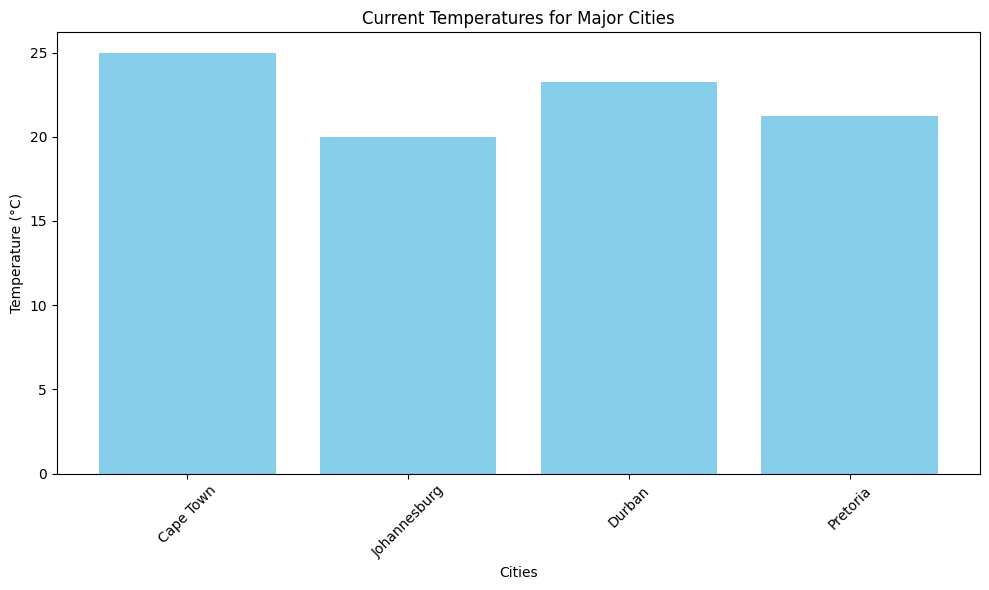

In [8]:
current_temperatures = []

for city, coordinates in SA_CITIES.items():
    lat, lon = map(float, coordinates.split(','))
    params['latitude'] = lat
    params['longitude'] = lon
    responses = openmeteo.weather_api(url, params=params)
    response = responses[0]
    current = response.Current()
    current_temperatures.append(current.Variables(4).Value())  # Current temperature_2m

fig, ax = plt.subplots(figsize=(10, 6))
bars = ax.bar(city_names, current_temperatures, color='skyblue')

ax.set_xlabel('Cities')
ax.set_ylabel('Temperature (°C)')
ax.set_title('Current Temperatures for Major Cities')
ax.set_xticks(x)
ax.set_xticklabels(city_names, rotation=45)

plt.tight_layout()
plt.show()

#### Wind Speed

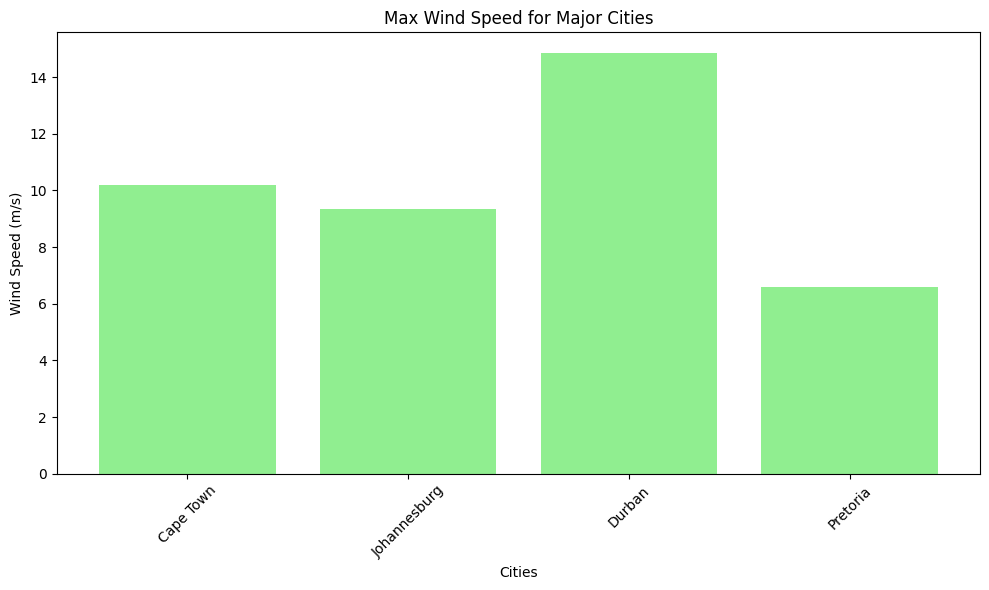

In [9]:
wind_speeds = []

for city, coordinates in SA_CITIES.items():
    lat, lon = map(float, coordinates.split(','))
    params['latitude'] = lat
    params['longitude'] = lon
    responses = openmeteo.weather_api(url, params=params)
    response = responses[0]
    daily = response.Daily()
    wind_speeds.append(daily.Variables(4).ValuesAsNumpy()[0])  # First day's max wind speed

fig, ax = plt.subplots(figsize=(10, 6))
bars = ax.bar(city_names, wind_speeds, color='lightgreen')

ax.set_xlabel('Cities')
ax.set_ylabel('Wind Speed (m/s)')
ax.set_title('Max Wind Speed for Major Cities')
ax.set_xticks(x)
ax.set_xticklabels(city_names, rotation=45)

plt.tight_layout()
plt.show()

#### Sunshine Duration

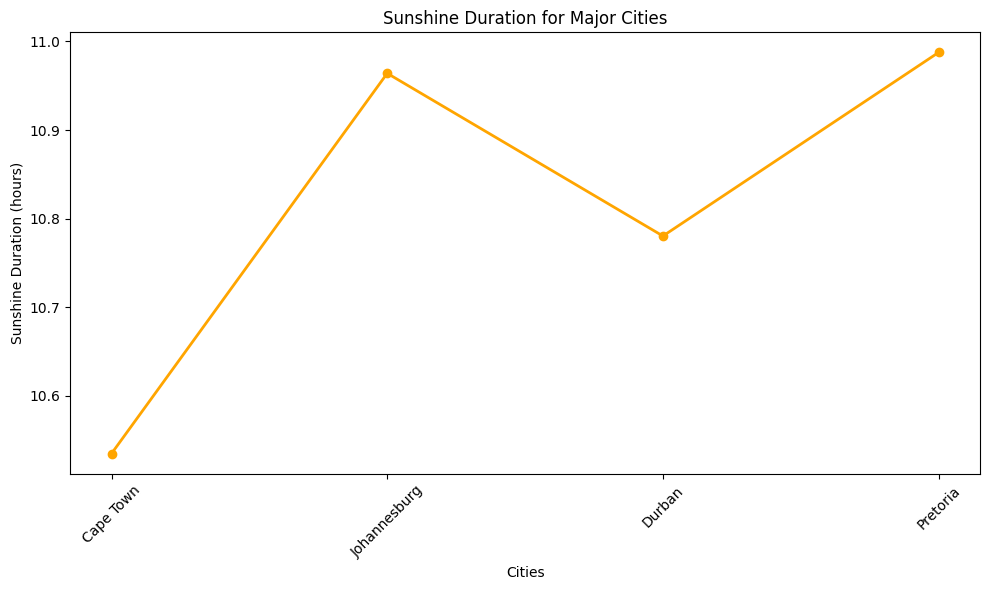

In [10]:
sunshine_durations = []

for city, coordinates in SA_CITIES.items():
    lat, lon = map(float, coordinates.split(','))
    params['latitude'] = lat
    params['longitude'] = lon
    responses = openmeteo.weather_api(url, params=params)
    response = responses[0]
    daily = response.Daily()
    sunshine_durations.append(daily.Variables(15).ValuesAsNumpy()[0] / 3600)  # First day's sunshine duration in hours

fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(city_names, sunshine_durations, marker='o', color='orange', linestyle='-', linewidth=2)

ax.set_xlabel('Cities')
ax.set_ylabel('Sunshine Duration (hours)')
ax.set_title('Sunshine Duration for Major Cities')
ax.set_xticks(x)
ax.set_xticklabels(city_names, rotation=45)

plt.tight_layout()
plt.show()
